In [0]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [400]:
#Import all the necessary modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,minmax_scale
from sklearn import model_selection
from sklearn import metrics
from scipy.stats import zscore

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc, roc_curve
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [401]:
df=pd.read_csv("E:/python basics/External lab resideny 3/Iris.csv")
df.sample(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
68,6.2,2.2,4.5,1.5,Iris-versicolor
8,4.4,2.9,1.4,0.2,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
46,5.1,3.8,1.6,0.2,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
23,5.1,3.3,1.7,0.5,Iris-setosa
55,5.7,2.8,4.5,1.3,Iris-versicolor
37,4.9,3.1,1.5,0.1,Iris-setosa
139,6.9,3.1,5.4,2.1,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [402]:
df['Sepal Length (in cm)']=df['Sepal Length (in cm)'].replace(0,df['Sepal Length (in cm)'].median())
df['Sepal Width in (cm)']=df['Sepal Width in (cm)'].replace(0,df['Sepal Width in (cm)'].median())
df['Petal length (in cm)']=df['Petal length (in cm)'].replace(0,df['Petal length (in cm)'].median())
df['Petal width (in cm)']=df['Petal width (in cm)'].replace(0,df['Petal width (in cm)'].median())

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [403]:
yinfo=pd.get_dummies(df['Class'])
df=pd.get_dummies(df)
df.columns

Index(['Sepal Length (in cm)', 'Sepal Width in (cm)', 'Petal length (in cm)',
       'Petal width (in cm)', 'Class_Iris-setosa', 'Class_Iris-versicolor',
       'Class_Iris-virginica'],
      dtype='object')

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [404]:
df.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class_Iris-setosa,Class_Iris-versicolor,Class_Iris-virginica
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,-0.717416,0.079396,0.638020
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,0.595601,-0.464700,-0.130901
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,-0.922688,0.201587,0.721102
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,-0.887510,0.118376,0.769134
Class_Iris-setosa,-0.717416,0.595601,-0.922688,-0.887510,1.000000,-0.500000,-0.500000
Class_Iris-versicolor,0.079396,-0.464700,0.201587,0.118376,-0.500000,1.000000,-0.500000
Class_Iris-virginica,0.638020,-0.130901,0.721102,0.769134,-0.500000,-0.500000,1.000000


In [405]:
df.drop(['Sepal Length (in cm)'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Sepal Width in (cm)      150 non-null float64
Petal length (in cm)     150 non-null float64
Petal width (in cm)      150 non-null float64
Class_Iris-setosa        150 non-null uint8
Class_Iris-versicolor    150 non-null uint8
Class_Iris-virginica     150 non-null uint8
dtypes: float64(3), uint8(3)
memory usage: 4.0 KB


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [406]:
print(df.iloc[:,0:1].var() < 0.1)
print(df.iloc[:,1:2].var() < 0.1)
print(df.iloc[:,2:3].var() < 0.1)
# No independent columns variance < 0.1

Sepal Width in (cm)    False
dtype: bool
Petal length (in cm)    False
dtype: bool
Petal width (in cm)    False
dtype: bool


## Question 6

*Plot the scatter matrix for all the variables.*

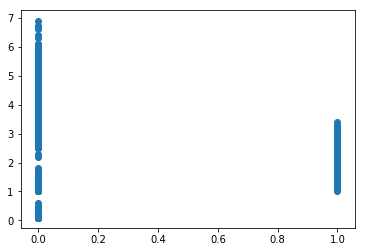

In [407]:
x = df[['Class_Iris-versicolor','Class_Iris-setosa','Class_Iris-virginica']]
y = df[['Sepal Width in (cm)','Petal length (in cm)','Petal width (in cm)']]
plt.scatter(x,y)


## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [408]:
y = yinfo
X = df[['Sepal Width in (cm)','Petal length (in cm)','Petal width (in cm)']]

In [409]:
test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [410]:
NNH = KNeighborsClassifier(n_neighbors=3)
NNH.fit(X_train,y_train)
flower_pred=NNH.predict(X_test)
score=NNH.score(X_test,y_test)
print(score)

0.9


In [411]:
NNH = KNeighborsClassifier(n_neighbors=5)
NNH.fit(X_train,y_train)
flower_pred=NNH.predict(X_test)
NNH.score(X_test,y_test)

0.8666666666666667

In [412]:
NNH = KNeighborsClassifier(n_neighbors=9)
NNH.fit(X_train,y_train)
flower_pred=NNH.predict(X_test)
NNH.score(X_test,y_test)

0.8666666666666667

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [413]:
optimal_MSE=0;
score_optimal =0;
MSE_ALL=[]
NNH = KNeighborsClassifier(n_neighbors=1)
NNH.fit(X_train,y_train)
flower_pred = NNH.predict(X_test)
score = NNH.score(X_test,y_test)
MSE= 1 - score
index =1
NNHI=0    
for i in np.arange(2,20):
    NNHI = KNeighborsClassifier(n_neighbors=i)
    NNHI.fit(X_train,y_train)
    flower_pred = NNHI.predict(X_test)
    score = NNHI.score(X_test,y_test)
    lowest_MSE = 1 - score
    MSE_ALL.append(MSE)
    if(MSE > lowest_MSE):
        MSE = lowest_MSE
        index=i
        score_optimal = NNHI.score(X_test,y_test)
        
print("The Model score {0} with neighbour {1} and lowest MSE  is : {2} ".format(score_optimal,index,MSE))        


The Model score 0.9333333333333333 with neighbour 13 and lowest MSE  is : 0.06666666666666665 


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

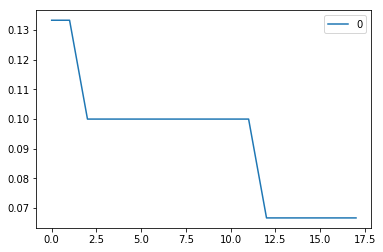

In [414]:
curve=pd.DataFrame(MSE_ALL)        
curve.plot()




# Naive Bayes with Iris Data

In [415]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [416]:
df=pd.read_csv("E:/python basics/External lab resideny 3/Iris.csv")
df1=df
df=pd.get_dummies(df,drop_first=True)

y = df[['Class_Iris-versicolor']]
X = df[['Sepal Width in (cm)','Petal length (in cm)','Petal width (in cm)','Class_Iris-virginica']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Sepal Length (in cm)     150 non-null float64
Sepal Width in (cm)      150 non-null float64
Petal length (in cm)     150 non-null float64
Petal width (in cm)      150 non-null float64
Class_Iris-versicolor    150 non-null uint8
Class_Iris-virginica     150 non-null uint8
dtypes: float64(4), uint8(2)
memory usage: 5.1 KB


In [417]:
#Check the dataset
print(y)
print(X)

     Class_Iris-versicolor
0                        0
1                        0
2                        0
3                        0
4                        0
5                        0
6                        0
7                        0
8                        0
9                        0
10                       0
11                       0
12                       0
13                       0
14                       0
15                       0
16                       0
17                       0
18                       0
19                       0
20                       0
21                       0
22                       0
23                       0
24                       0
25                       0
26                       0
27                       0
28                       0
29                       0
..                     ...
120                      0
121                      0
122                      0
123                      0
124                      0
1

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Class, dtype: int64


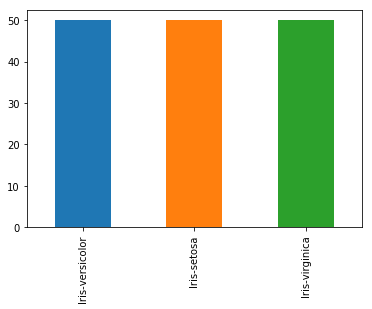

In [418]:
df1['Class'].value_counts().plot(kind="bar")
print(df1['Class'].value_counts())

In [419]:
#Drop Id variable from data

In [432]:
# No Id variable from data exist.

### Question 12 
Find Correlation among all variables and give your insights 

In [420]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [421]:
df.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class_Iris-versicolor,Class_Iris-virginica
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.079396,0.638020
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.464700,-0.130901
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.201587,0.721102
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.118376,0.769134
Class_Iris-versicolor,0.079396,-0.464700,0.201587,0.118376,1.000000,-0.500000
Class_Iris-virginica,0.638020,-0.130901,0.721102,0.769134,-0.500000,1.000000


In [422]:
df.drop(['Sepal Length (in cm)'],axis=1,inplace=True)
df.drop(['Class_Iris-virginica'],axis=1,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
Sepal Width in (cm)      150 non-null float64
Petal length (in cm)     150 non-null float64
Petal width (in cm)      150 non-null float64
Class_Iris-versicolor    150 non-null uint8
dtypes: float64(3), uint8(1)
memory usage: 3.7 KB


### Split data in Training and test set in 80:20.

In [423]:
test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Question 13 
Do Feature Scaling 

In [424]:
# Use StandardScaler or similar methods
sc=StandardScaler()
sc.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.03205722e+00, -1.34127240e+00, -1.31297673e+00,
        -7.07106781e-01],
       [-1.24957601e-01, -1.34127240e+00, -1.31297673e+00,
        -7.07106781e-01],
       [ 3.37848329e-01, -1.39813811e+00, -1.31297673e+00,
        -7.07106781e-01],
       [ 1.06445364e-01, -1.28440670e+00, -1.31297673e+00,
        -7.07106781e-01],
       [ 1.26346019e+00, -1.34127240e+00, -1.31297673e+00,
        -7.07106781e-01],
       [ 1.95766909e+00, -1.17067529e+00, -1.05003079e+00,
        -7.07106781e-01],
       [ 8.00654259e-01, -1.34127240e+00, -1.18150376e+00,
        -7.07106781e-01],
       [ 8.00654259e-01, -1.28440670e+00, -1.31297673e+00,
        -7.07106781e-01],
       [-3.56360566e-01, -1.34127240e+00, -1.31297673e+00,
        -7.07106781e-01],
       [ 1.06445364e-01, -1.28440670e+00, -1.44444970e+00,
        -7.07106781e-01],
       [ 1.49486315e+00, -1.28440670e+00, -1.31297673e+00,
        -7.07106781e-01],
       [ 8.00654259e-01, -1.22754100e+00, -1.31297673e+00,
      

In [425]:
model = GaussianNB()

### Question 14 
Train and Fit NaiveBayes Model

In [426]:
#Fit the model
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [427]:
#Predict
y_pred=model.predict(X_test)


### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [428]:
# show Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[18,  0],
       [ 0, 12]], dtype=int64)

In [429]:
# show accuracy

model.score(X_test,y_test)

1.0

In [430]:
#Show precision and Recall metrics

In [431]:
print(recall_score(y_test, y_pred))
print(precision_score(y_test,y_pred))

1.0
1.0


# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [0]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [0]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [0]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [0]:
# use from sklearn.svm import SVC

In [0]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [0]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [0]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [0]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [0]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [0]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
gs.best_score_ 

0.77777777777777779